In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
df = pd.read_parquet('data_tbe.parquet')

# Define trading hours
start_trading_time = pd.Timestamp('09:15:00').time()
end_trading_time = pd.Timestamp('15:30:00').time()

df_trading_hours = df.between_time(start_trading_time, end_trading_time)

# print(df_trading_hours.head())
df_trading_hours


,banknifty,nifty,tte
time,,,
2021-01-01 09:15:00,0.286058,0.199729,27
2021-01-01 09:16:00,0.285381,0.200433,27
2021-01-01 09:17:00,0.284233,0.200004,27
2021-01-01 09:18:00,0.286104,0.199860,27
2021-01-01 09:19:00,0.285539,0.198951,27
...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28
2022-06-30 15:27:00,0.240875,0.216558,28
2022-06-30 15:28:00,0.242115,0.216794,28


In [3]:
df= df_trading_hours

In [4]:
missing_values_per_column = df.isnull().sum()

# Check for missing values in the entire dataset
total_missing_values = df.isnull().sum().sum()

print("Missing values per column:")
print(missing_values_per_column)
print("\nTotal missing values in the dataset:", total_missing_values)

Missing values per column:
banknifty    370
nifty        477
tte            0
dtype: int64

Total missing values in the dataset: 847


In [5]:
# df

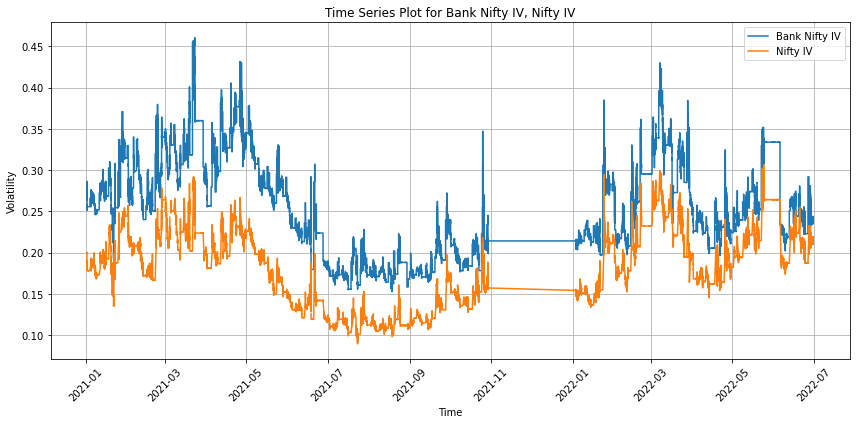

In [6]:
plt.figure(figsize=(12, 6)) # Plot Bank Nifty IV
plt.plot(df.index, df['banknifty'], label='Bank Nifty IV',drawstyle='steps')
plt.plot(df.index, df['nifty'], label='Nifty IV')

plt.xlabel('Time')
plt.ylabel('Volatility')
plt.title('Time Series Plot for Bank Nifty IV, Nifty IV')
plt.legend()
plt.xticks(rotation=45)

plt.grid(True)
plt.tight_layout()
plt.show()
# df

In [7]:
correlation = df['nifty'].corr(df['banknifty'])
print("Correlation between Nifty and Bank Nifty:", correlation)

Correlation between Nifty and Bank Nifty: 0.897291202690001


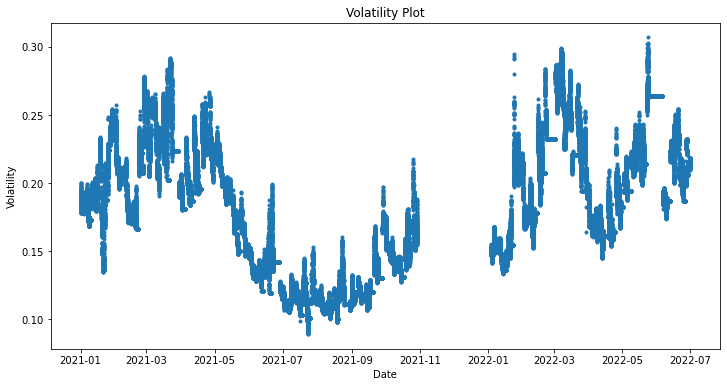

In [8]:
plt.figure(figsize=(12, 6))
plt.scatter(df.index, df['nifty'], marker='.')

plt.xlabel('Date')
plt.ylabel('Volatility')
plt.title('Volatility Plot')
plt.show()

In [9]:
start_date = '2021-11-01'
end_date = '2022-01-30'

df_investigation = df[start_date:end_date]
df_investigation

#concluding that 2021-11-01 to 2022-01-30 data is missing in the dataset and
# that is why the total number of rows was less than expected value of 375*(365+181)

,banknifty,nifty,tte
time,,,
2022-01-03 09:15:00,0.214152,0.154115,24
2022-01-03 09:16:00,0.214935,0.155385,24
2022-01-03 09:17:00,0.216027,0.154671,24
2022-01-03 09:18:00,0.213095,0.153413,24
2022-01-03 09:19:00,0.213160,0.153133,24
...,...,...,...
2022-01-30 15:26:00,0.282907,0.211083,27
2022-01-30 15:27:00,0.282907,0.211083,27
2022-01-30 15:28:00,0.282907,0.211083,27


In [10]:
# Calculate the percentage of missing values in each column
missing_percentage = (df.isnull().sum() / len(df)) * 100
missing_percentage
# plt.figure(figsize=(10, 6))
# missing_percentage.plot(kind='bar')
# plt.title('Percentage of Missing Values in Each Column')
# plt.xlabel('Columns')
# plt.ylabel('Percentage of Missing Values')
# plt.xticks(rotation=45)
# plt.show()


banknifty    0.204583
nifty        0.263746
tte          0.000000
dtype: float64

In [11]:
df.interpolate(method='polynomial', order=2, inplace=True)  # 2nd order polynomial

print(df.isna().sum())  # Verify if any missing values remain


banknifty    0
nifty        0
tte          0
dtype: int64


In [12]:
df.shape

(180856, 3)

In [13]:
df['Spread'] = df['banknifty'] - df['nifty']
df= pd.DataFrame(df)
# df

In [14]:
# Calculate mean and standard deviation of the spread
spread_mean = df['Spread'].mean()
spread_std = df['Spread'].std()

print(f"The mean of the spread is {spread_mean:.4f}.")
print(f"The standard deviation of the spread is {spread_std:.4f}.")


The mean of the spread is 0.0719.
The standard deviation of the spread is 0.0265.


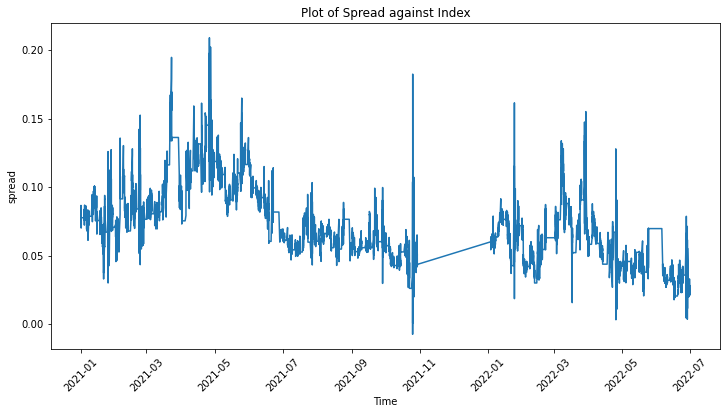

In [15]:
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Spread'])

plt.xlabel('Time')
plt.ylabel('spread')
plt.title('Plot of Spread against Index')
plt.xticks(rotation=45)
plt.show()


In [16]:
# Calculate the z-score for each spread value
df['Z-Score'] = (df['Spread'] - spread_mean) / spread_std 
df['Z-Score'].min(),df['Z-Score'].max()

(-2.992490505974068, 5.167589485682149)

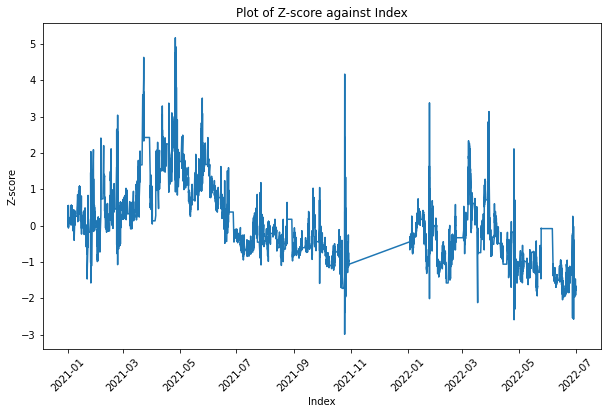

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Z-Score'])

plt.xlabel('Index')
plt.ylabel('Z-score')
plt.title('Plot of Z-score against Index')
plt.xticks(rotation=45)

plt.show()


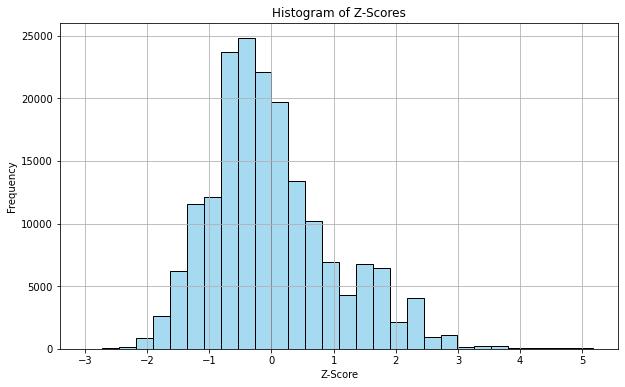

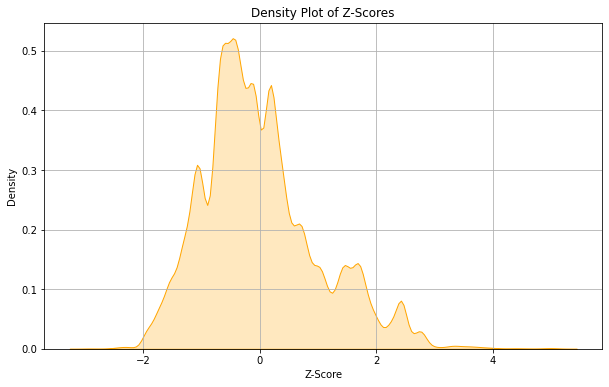

In [18]:
# Plot a histogram of Z-scores
plt.figure(figsize=(10, 6))
sns.histplot(df['Z-Score'], bins=30, kde=False, color='skyblue')
plt.title('Histogram of Z-Scores')
plt.xlabel('Z-Score')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Plot a density plot of Z-scores
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Z-Score'], color='orange', shade=True)
plt.title('Density Plot of Z-Scores')
plt.xlabel('Z-Score')
plt.ylabel('Density')
plt.grid(True)
plt.show()


In [21]:

df['P/L'] = df['Spread'] * (df['tte'] ** 0.7)
# df

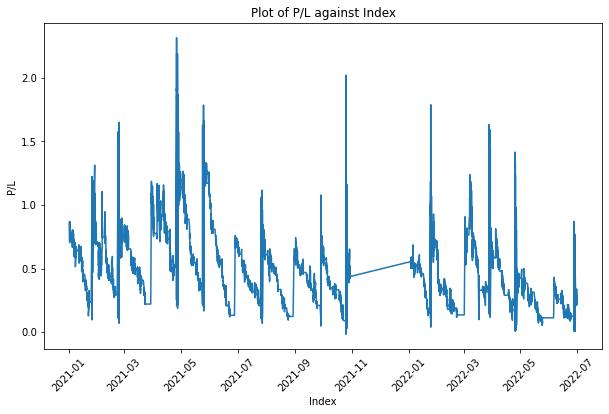

In [22]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['P/L'])

plt.xlabel('Index')
plt.ylabel('P/L')
plt.title('Plot of P/L against Index')
plt.xticks(rotation=45)

plt.show()


In [ ]:
# df

In [23]:
buy_threshold =  -1.5
sell_threshold =2

# Generate trading signals based on z-scores and thresholds
df['Signal'] = np.where(df['Z-Score'] < buy_threshold, 'Buy',
                        np.where(df['Z-Score'] > sell_threshold, 'Sell', 'Hold'))# Initialize variables to track trades and P/L
trades = []
current_position = None
entry_price = None
exit_price = None
current_pnl = 0

# Iterate over each row in the DataFrame
for index, row in df.iterrows():
    # Check if there's a signal to buy
    if row['Signal'] == 'Buy' and current_position != 'Buy':
        # Close existing position if any
        if current_position == 'Sell':
            exit_price = row['Spread'] * (row['tte'] ** 0.7)
            current_pnl += entry_price - exit_price
            trades.append((index, 'Sell', entry_price, exit_price, current_pnl))
        # Open new long position
        entry_price = row['Spread'] * (row['tte'] ** 0.7)
        current_position = 'Buy'
    # Check if there's a signal to sell
    elif row['Signal'] == 'Sell' and current_position != 'Sell':
        # Close existing position if any
        if current_position == 'Buy':
            exit_price = row['Spread'] * (row['tte'] ** 0.7)
            current_pnl += exit_price - entry_price
            trades.append((index, 'Buy', entry_price, exit_price, current_pnl))
        # Open new short position
        entry_price = row['Spread'] * (row['tte'] ** 0.7)
        current_position = 'Sell'
    # Hold position if no signal
    elif row['Signal'] == 'Hold':
        # Close existing position if any
        if current_position is not None:
            exit_price = row['Spread'] * (row['tte'] ** 0.7)
            if current_position == 'Buy':
                current_pnl += exit_price - entry_price
            elif current_position == 'Sell':
                current_pnl += entry_price - exit_price
            trades.append((index, current_position, entry_price, exit_price, current_pnl))
            current_position = None

# Print the trades and their P/L
print("Trades:")
print("Index\t\tPosition\tEntry Price\tExit Price\tP/L")
for trade in trades:
    print(f"{trade[0]}\t{trade[1]}\t\t{trade[2]:.3f}\t\t{trade[3]:.2f}\t\t{trade[4]:.3f}")


Trades:
Index		Position	Entry Price	Exit Price	P/L
2021-01-25 14:44:00	Sell		0.272		0.21		0.058
2021-01-25 15:19:00	Buy		0.331		0.59		0.316
2021-01-28 09:16:00	Sell		1.312		1.11		0.522
2021-02-05 10:10:00	Sell		1.026		0.99		0.563
2021-02-08 09:21:00	Sell		0.932		0.88		0.611
2021-02-16 09:19:00	Sell		0.596		0.58		0.629
2021-02-22 09:22:00	Sell		1.461		1.26		0.826
2021-02-22 09:30:00	Sell		1.568		0.13		2.266
2021-02-22 09:40:00	Sell		1.483		1.11		2.643
2021-02-22 09:44:00	Sell		1.473		1.19		2.927
2021-02-22 10:41:00	Sell		1.521		0.96		3.484
2021-02-22 11:14:00	Sell		1.461		1.19		3.752
2021-02-22 11:27:00	Sell		1.467		0.87		4.346
2021-02-22 11:36:00	Sell		1.503		1.22		4.633
2021-02-22 11:40:00	Sell		1.524		1.20		4.958
2021-02-22 11:43:00	Sell		1.520		1.26		5.220
2021-02-22 11:53:00	Sell		1.519		1.20		5.536
2021-02-22 12:06:00	Sell		1.525		1.23		5.835
2021-02-22 12:10:00	Sell		0.270		0.27		5.836
2021-02-22 12:31:00	Sell		1.504		1.12		6.221
2021-02-22 12:34:00	Sell		1.525		0.15		7.596
2021-

2021-10-26 10:26:00	Buy		0.032		0.53		60.257
2021-10-26 12:24:00	Buy		0.034		0.06		60.284
2021-10-26 12:31:00	Buy		0.036		0.06		60.311
2021-10-26 12:35:00	Buy		0.037		0.06		60.338
2021-10-26 12:37:00	Buy		0.036		0.55		60.853
2021-10-26 13:02:00	Buy		0.040		0.74		61.550
2021-10-26 13:20:00	Buy		0.039		0.06		61.575
2021-10-26 13:29:00	Buy		0.038		0.07		61.607
2022-01-24 14:12:00	Sell		1.730		1.06		62.280
2022-01-24 14:17:00	Sell		1.457		0.25		63.485
2022-01-24 14:19:00	Sell		1.637		1.07		64.048
2022-01-24 14:40:00	Sell		1.405		0.04		65.413
2022-01-24 14:41:00	Buy		0.040		1.21		66.585
2022-01-24 14:46:00	Sell		1.454		0.91		67.132
2022-02-11 15:22:00	Buy		0.188		0.20		67.143
2022-02-14 09:15:00	Buy		0.183		0.27		67.225
2022-02-15 14:57:00	Buy		0.149		0.15		67.230
2022-03-07 14:21:00	Sell		1.176		1.15		67.254
2022-03-07 14:30:00	Sell		1.182		1.14		67.293
2022-03-07 14:36:00	Sell		1.158		1.10		67.355
2022-03-08 09:24:00	Sell		1.131		1.11		67.375
2022-03-08 09:31:00	Sell		1.124		1.08		67.418


In [ ]:
# df

In [43]:
def calculate_profit_loss(df, buy_threshold, sell_threshold):
    temp = df
   
    temp['Signal'] = np.where(temp['Z-Score'] < buy_threshold, 'Buy',
                        np.where(temp['Z-Score'] > sell_threshold, 'Sell', 'Hold'))# Initialize variables to track trades and P/L
    trades = []
    current_position = None
    entry_price = None
    exit_price = None
    current_pnl = 0

    # Iterate over each row in the DataFrame
    for index, row in temp.iterrows():
        # Check if there's a signal to buy
        if row['Signal'] == 'Buy' and current_position != 'Buy':
            # Close existing position if any
            if current_position == 'Sell':
                exit_price = row['Spread'] * (row['tte'] ** 0.7)
                current_pnl += entry_price - exit_price
                trades.append((index, 'Sell', entry_price, exit_price, current_pnl))
            # Open new long position
            entry_price = row['Spread'] * (row['tte'] ** 0.7)
            current_position = 'Buy'
        # Check if there's a signal to sell
        elif row['Signal'] == 'Sell' and current_position != 'Sell':
            # Close existing position if any
            if current_position == 'Buy':
                exit_price = row['Spread'] * (row['tte'] ** 0.7)
                current_pnl += exit_price - entry_price
                trades.append((index, 'Buy', entry_price, exit_price, current_pnl))
            # Open new short position
            entry_price = row['Spread'] * (row['tte'] ** 0.7)
            current_position = 'Sell'
        # Hold position if no signal
        elif row['Signal'] == 'Hold':
            # Close existing position if any
            if current_position is not None:
                exit_price = row['Spread'] * (row['tte'] ** 0.7)
                if current_position == 'Buy':
                    current_pnl += exit_price - entry_price
                elif current_position == 'Sell':
                    current_pnl += entry_price - exit_price
                trades.append((index, current_position, entry_price, exit_price, current_pnl))
                current_position = None

    # Calculate total profit/loss
    total_profit_loss = current_pnl
    return total_profit_loss


In [26]:
calculate_profit_loss(df,-1.5,2)

114.89072928903005

In [ ]:
# df

In [44]:
calculate_profit_loss(df,-2,3)

55.13522863747638

In [27]:
thres_list = [(-2,3), (-1.5,2)]

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Buy Threshold', 'Sell Threshold', 'Total Profit/Loss'])

# Iterate through the threshold tuples
for threshold in thres_list:
    buy_threshold, sell_threshold = threshold
    total_profit_loss = calculate_profit_loss(df, buy_threshold, sell_threshold)
    results_df = results_df.append({'Buy Threshold': buy_threshold,
                                    'Sell Threshold': sell_threshold,
                                    'Total Profit/Loss': total_profit_loss}, ignore_index=True)

# Print the results DataFrame
print(results_df)

   Buy Threshold  Sell Threshold  Total Profit/Loss
0           -2.0             3.0          55.135229
1           -1.5             2.0         114.890729


In [49]:

thres_list = [(-2,3), (-1.5,2)]

# Create an empty DataFrame to store results
results_df = pd.DataFrame(columns=['Buy Threshold', 'Sell Threshold', 'Total Profit/Loss'])

# Iterate through the threshold tuples
for threshold in thres_list:
    buy_threshold, sell_threshold = threshold
    total_profit_loss = calculate_profit_loss(df, buy_threshold, sell_threshold)
    results_df = results_df.append({'Buy Threshold': buy_threshold,
                                    'Sell Threshold': sell_threshold,
                                    'Total Profit/Loss': total_profit_loss}, ignore_index=True)

# Print the results DataFrame
print(results_df)

   Buy Threshold  Sell Threshold  Total Profit/Loss
0           -2.0             3.0          55.135229
1           -1.5             2.0         114.890729


                            OLS Regression Results                            
Dep. Variable:              banknifty   R-squared:                       0.805
Model:                            OLS   Adj. R-squared:                  0.805
Method:                 Least Squares   F-statistic:                 7.472e+05
Date:                Sun, 24 Mar 2024   Prob (F-statistic):               0.00
Time:                        21:58:17   Log-Likelihood:             4.0465e+05
No. Observations:              180856   AIC:                        -8.093e+05
Df Residuals:                  180854   BIC:                        -8.093e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0481      0.000    196.914      0.0

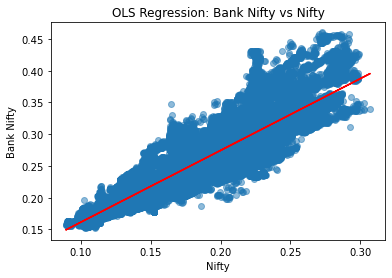

In [29]:
# Fit the OLS model

X = df['nifty']
Y = df['banknifty']

X = sm.add_constant(X)
model = sm.OLS(Y, X).fit()
residuals = Y-model.predict(X)

print(model.summary())

# Plot the data points and the regression line
plt.scatter(df['nifty'], df['banknifty'], alpha=0.5)  # Scatter plot of the data points
plt.plot(df['nifty'], model.predict(X), color='red')  # Regression line
plt.xlabel('Nifty')
plt.ylabel('Bank Nifty')
plt.title('OLS Regression: Bank Nifty vs Nifty')
plt.show()


In [30]:
slope = model.params['nifty']
intercept = model.params['const']
mse = np.mean(residuals ** 2)
std=np.sqrt(mse)

print(f"Regression Line Equation: Bank Nifty = {slope:.4f} * Nifty + {intercept:.4f}")
print("Mean Squared Error:", mse)
print("Standard deviation:", std)


Regression Line Equation: Bank Nifty = 1.1320 * Nifty + 0.0481
Mean Squared Error: 0.0006670163040880765
Standard deviation: 0.025826658786766758


In [38]:
df['pred_banknifty']=model.predict(X)
df['diff']=(df['banknifty']-df['pred_banknifty'])/std


,banknifty,nifty,tte,Spread,Z-Score,P/L,Signal,pred_banknifty,diff,Signal2
time,,,,,,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.086329,0.543765,0.867184,Hold,0.274159,0.460713,Hold
2021-01-01 09:16:00,0.285381,0.200433,27,0.084948,0.491753,0.853317,Hold,0.274956,0.403665,Hold
2021-01-01 09:17:00,0.284233,0.200004,27,0.084229,0.464645,0.846089,Hold,0.274471,0.377996,Hold
2021-01-01 09:18:00,0.286104,0.199860,27,0.086244,0.540543,0.866325,Hold,0.274308,0.456733,Hold
2021-01-01 09:19:00,0.285539,0.198951,27,0.086588,0.553523,0.869786,Hold,0.273279,0.474717,Hold
...,...,...,...,...,...,...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,0.025943,-1.731329,0.267320,Buy,0.291172,-1.954226,Buy
2022-06-30 15:27:00,0.240875,0.216558,28,0.024317,-1.792609,0.250560,Buy,0.293210,-2.026406,Buy
2022-06-30 15:28:00,0.242115,0.216794,28,0.025321,-1.754764,0.260910,Buy,0.293476,-1.988713,Buy


In [46]:
def calc_pl(df, buy_threshold, sell_threshold):
    tem=df
    tem['Signal'] = np.where(tem['diff'] < buy_threshold, 'Buy',
                        np.where(tem['diff'] > sell_threshold, 'Sell', 'Hold'))# Initialize variables to track trades and P/L
    trades = []
    current_position = None
    entry_price = None
    exit_price = None
    current_pnl = 0

    # Iterate over each row in the DataFrame
    for index, row in tem.iterrows():
        # Check if there's a signal to buy
        if row['Signal'] == 'Buy' and current_position != 'Buy':
            # Close existing position if any
            if current_position == 'Sell':
                exit_price = row['Spread'] * (row['tte'] ** 0.7)
                current_pnl += entry_price - exit_price
                trades.append((index, 'Sell', entry_price, exit_price, current_pnl))
            # Open new long position
            entry_price = row['Spread'] * (row['tte'] ** 0.7)
            current_position = 'Buy'
        # Check if there's a signal to sell
        elif row['Signal'] == 'Sell' and current_position != 'Sell':
            # Close existing position if any
            if current_position == 'Buy':
                exit_price = row['Spread'] * (row['tte'] ** 0.7)
                current_pnl += exit_price - entry_price
                trades.append((index, 'Buy', entry_price, exit_price, current_pnl))
            # Open new short position
            entry_price = row['Spread'] * (row['tte'] ** 0.7)
            current_position = 'Sell'
        # Hold position if no signal
        elif row['Signal'] == 'Hold':
            # Close existing position if any
            if current_position is not None:
                exit_price = row['Spread'] * (row['tte'] ** 0.7)
                if current_position == 'Buy':
                    current_pnl += exit_price - entry_price
                elif current_position == 'Sell':
                    current_pnl += entry_price - exit_price
                trades.append((index, current_position, entry_price, exit_price, current_pnl))
                current_position = None

    total_profit_loss = current_pnl
    return total_profit_loss


In [42]:
df.drop(columns=['Signal2','Signal'])

,banknifty,nifty,tte,Spread,Z-Score,P/L,pred_banknifty,diff
time,,,,,,,,
2021-01-01 09:15:00,0.286058,0.199729,27,0.086329,0.543765,0.867184,0.274159,0.460713
2021-01-01 09:16:00,0.285381,0.200433,27,0.084948,0.491753,0.853317,0.274956,0.403665
2021-01-01 09:17:00,0.284233,0.200004,27,0.084229,0.464645,0.846089,0.274471,0.377996
2021-01-01 09:18:00,0.286104,0.199860,27,0.086244,0.540543,0.866325,0.274308,0.456733
2021-01-01 09:19:00,0.285539,0.198951,27,0.086588,0.553523,0.869786,0.273279,0.474717
...,...,...,...,...,...,...,...,...
2022-06-30 15:26:00,0.240701,0.214758,28,0.025943,-1.731329,0.267320,0.291172,-1.954226
2022-06-30 15:27:00,0.240875,0.216558,28,0.024317,-1.792609,0.250560,0.293210,-2.026406
2022-06-30 15:28:00,0.242115,0.216794,28,0.025321,-1.754764,0.260910,0.293476,-1.988713


In [ ]:
# calc_pl(df,-1.5,2)

In [47]:
thres_list = [(-2,3), (-1.5,2)]

# Create an empty DataFrame to store results
results = pd.DataFrame(columns=['Buy Threshold', 'Sell Threshold', 'Total Profit/Loss'])

# Iterate through the threshold tuples
for threshold in thres_list:
    buy_threshold, sell_threshold = threshold
    total_profit_loss = calc_pl(df, buy_threshold, sell_threshold)
    results = results.append({'Buy Threshold': buy_threshold,
                                    'Sell Threshold': sell_threshold,
                                    'Total Profit/Loss': total_profit_loss}, ignore_index=True)

# Print the results DataFrame
print(results)

   Buy Threshold  Sell Threshold  Total Profit/Loss
0           -2.0             3.0          61.812865
1           -1.5             2.0         121.435889


In [52]:

thres_list = [(-2, 3), (-1.5, 2)]

results_combined = pd.DataFrame(columns=['Buy Threshold', 'Sell Threshold', 'Total P/L for z-score', 'Total P/L for Linear model'])

for threshold in thres_list:
    buy_threshold, sell_threshold = threshold
    total_profit_loss_z = calculate_profit_loss(df, buy_threshold, sell_threshold)
    total_profit_loss_l = calc_pl(df, buy_threshold, sell_threshold) 
    results_combined = results_combined.append({'Buy Threshold': buy_threshold,
                                                'Sell Threshold': sell_threshold,
                                                'Total P/L for z-score': total_profit_loss_z,
                                                'Total P/L for Linear model': total_profit_loss_l}, ignore_index=True)
print(results_combined)


   Buy Threshold  Sell Threshold  Total P/L for z-score  \
0           -2.0             3.0              55.135229   
1           -1.5             2.0             114.890729   

   Total P/L for Linear model  
0                   61.812865  
1                  121.435889  
